In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_excel("car_evaluation.xlsx" , names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Target"])
df.info()

df_text = df.copy()
for col in df_text.columns:
    df_text[col] = df_text[col].astype(str)
df_text = df_text.replace({'5more':'more'})

NameError: name 'pd' is not defined

In [ ]:
for col in df.columns:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col].astype(str))

df

,buying,maint,doors,persons,lug_boot,safety,Target
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [34]:
y = df['Target'].to_numpy()
X = df.drop(['Target'], axis = 1).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.15, random_state=42)


In [39]:
clf = tree.DecisionTreeClassifier(max_depth = 25)
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9730769230769231
1.0


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.456\nsamples = 1467\nvalue = [326, 61, 1029, 51]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 486\nvalue = [0, 0, 486, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.577\nsamples = 981\nvalue = [326, 61, 543, 51]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.627\nsamples = 326\nvalue = [176, 25, 74, 51]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.432\nsamples = 655\nvalue = [150, 36, 469, 0]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

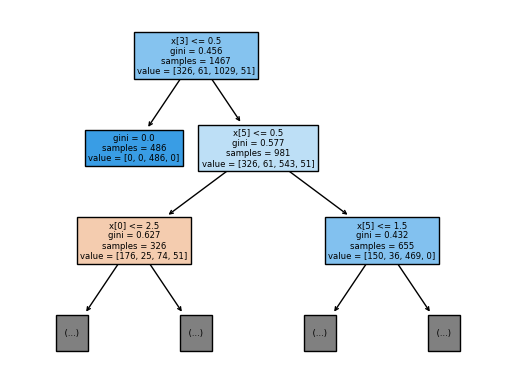

In [38]:
tree.plot_tree(clf, filled = True, max_depth=2)

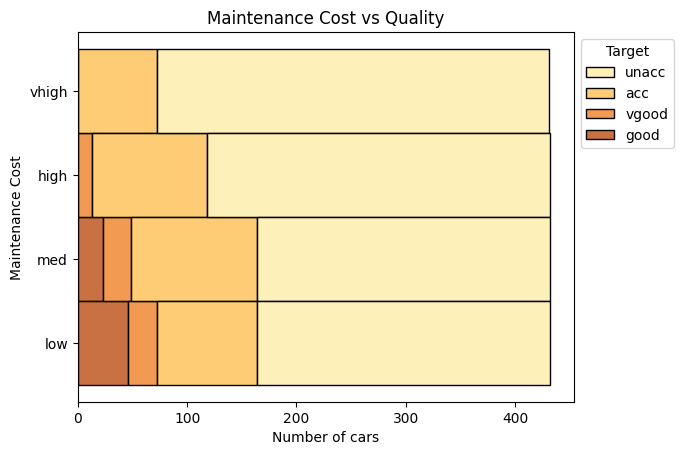

In [19]:
ax = sns.histplot(y=df_text['maint'],palette='YlOrBr',hue=df_text['Target'],multiple="stack",bins=3)
plt.title("Maintenance Cost vs Quality")
plt.xlabel("Number of cars")
plt.ylabel("Maintenance Cost")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

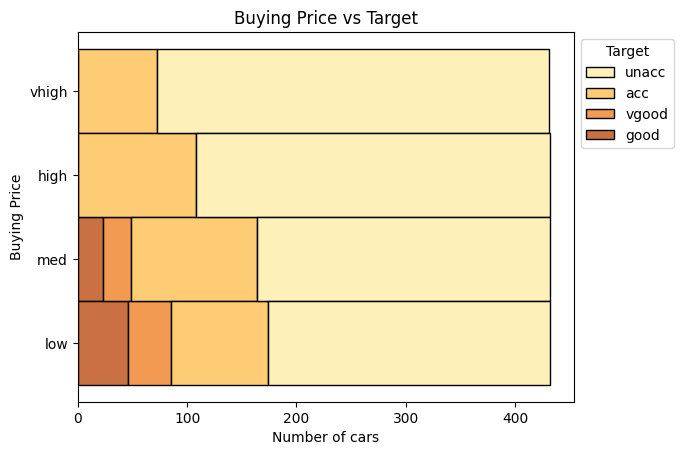

In [18]:
ax = sns.histplot(y=df_text['buying'],palette='YlOrBr',hue=df_text['Target'],multiple="stack",bins=3)
plt.title("Buying Price vs Target")
plt.xlabel("Number of cars")
plt.ylabel("Buying Price")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

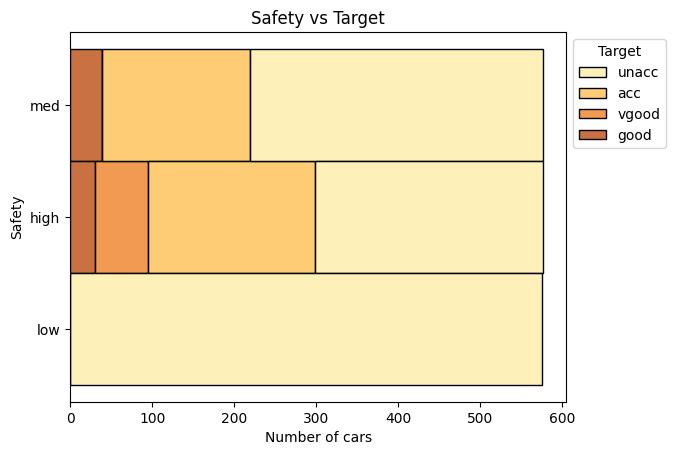

In [25]:
ax = sns.histplot(y=df_text['safety'],palette='YlOrBr',hue=df_text['Target'],multiple="stack",bins=3)
plt.title("Safety vs Target")
plt.xlabel("Number of cars")
plt.ylabel("Safety")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

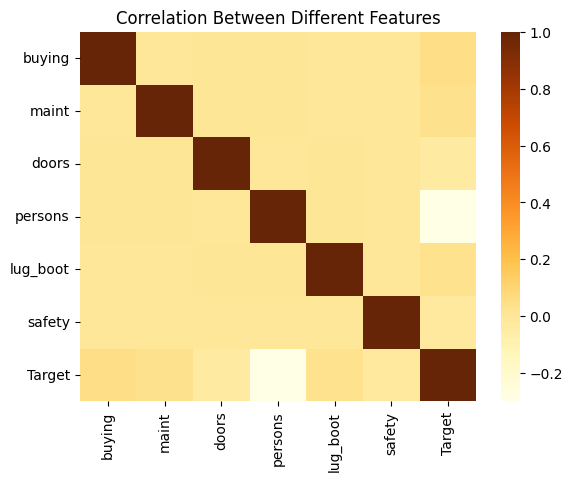

In [30]:
dataplot=sns.heatmap(df.corr(),cmap='YlOrBr')
plt.title("Correlation Between Different Features")
plt.show()